In [1]:
import kaleido
import pandas as pd
import numpy as np
import plotly.graph_objects as go
######## Search space #########
import sys
sys.path.append("../")
from search_space.RegNet import RegNet
from search_space.utils import create_widths_plot, scatter_results
# Initialize an empty list to store dictionaries
def results_to_df(path, name):
    data = []
    # Open the text file
    with open(path, 'r') as file:
        lines = file.readlines()
        # Initialize an empty dictionary to store data for each block
        block_data = {}
        for line in lines:
            # If the line contains dashes, it indicates the end of a block
            if '-------------------------' in line:
                # If block_data is not empty, add it to the list of data dictionaries
                if block_data:
                    data.append(block_data)
                    # Reset block_data for the next block
                    block_data = {}
            elif 'best_acc' in line:
                continue
            else:
                # Split the line by ':'
                #print(line)
                key, value = line.strip().split(': ')
                # Store the key-value pair in the block_data dictionary
                block_data[key] = value

    # Create a DataFrame from the list of dictionaries
    df = pd.DataFrame(data)

    # Convert columns to appropriate data types if needed
    df['epoch'] = df['epoch'].astype(int)
    df['lr'] = df['lr'].astype(float)
    df['train_acc'] = df['train_acc'].astype(float)
    df['train_loss'] = df['train_loss'].astype(float)
    df['test_acc'] = df['test_acc'].astype(float)
    df['test_acc_top5'] = df['test_acc_top5'].astype(float)
    df['test_loss'] = df['test_loss'].astype(float)
    df['epoch_time'] = df['epoch_time'].astype(float)
    df=df.assign(name=name)
    
    return df

/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import json
import os

def get_predictor_data(studies):
    train_data=[]
    for study_folder in studies: 
        data=[]
        #study_folder=f"/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/classifier_train/{study_name}"
        subjects= os.listdir(study_folder)

        subjects=[subject for subject in subjects if os.path.isdir(f"{study_folder}/{subject}")]
        print(subjects)
        for name in subjects:
            try:
                test_acc=results_to_df(f"{study_folder}/{name}/worklog.txt", f"{name}")[["epoch","test_acc","name"]]
                #test_acc=test_acc.rename(columns={"test_acc":"acc","test_loss":"test_acc"})
                #test_acc=test_acc.rename(columns={"test_loss":"test_acc"})
                #print(test_acc.columns)
                #if len(test_acc)>49:
                test_acc_piv = test_acc[["epoch","test_acc","name"]].pivot(index='name', columns='epoch', values='test_acc').add_prefix("epoch_").reset_index()
                #test_acc_piv["best_acc"]=test_acc["acc"].max()
                data.append(test_acc_piv)
            except:
                pass
        data=pd.concat(data)
        train_data.append(data)
    train_data=pd.concat(train_data)
    return train_data


In [3]:
corr_scores={}
accuracies={}
test_accuracies={}
epochs_results={}

In [268]:
import pandas as pd
from itertools import combinations
dataset="LaMelo"
if dataset=="Gutenberg":
    train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/Gutenberg"]).sort_values("name").set_index("name")
elif dataset=="Mateo":
    train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/Mateo"]).sort_values("name").set_index("name")
elif dataset=="Chester":
    train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/Chester"]).sort_values("name").set_index("name")
elif dataset=="Adaline":
    train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/Adaline"]).sort_values("name").set_index("name")
elif dataset=="LaMelo":
    train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/LaMelo"]).sort_values("name").set_index("name")
elif dataset=="Caitie":
    train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/Caitie"]).sort_values("name").set_index("name")
    train_data=train_data.iloc[:-1,:]
elif dataset=="Sadie":
    train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/Sadie"]).sort_values("name").set_index("name")



['adaptable_jacamar', 'adventurous_wallaby', 'aloof_fulmar', 'ambrosial_leopard', 'amusing_lobster', 'angelic_coati', 'antique_anteater', 'artichoke_shrimp', 'astute_barracuda', 'attentive_nyala', 'auburn_sturgeon', 'authentic_coua', 'benign_guan', 'blue_butterfly', 'bold_bettong', 'brainy_hound', 'brown_bumblebee', 'bulky_whippet', 'camouflaged_kittiwake', 'charming_scorpion', 'colossal_hedgehog', 'convivial_jellyfish', 'cornflower_salamander', 'crafty_hyrax', 'curious_viper', 'curly_emu', 'dangerous_degu', 'demonic_hornet', 'dexterous_raccoon', 'didactic_armadillo', 'discerning_beluga', 'elated_pig', 'elegant_peccary', 'enlightened_impala', 'fat_parakeet', 'fat_walrus', 'fervent_mayfly', 'fluffy_boa', 'fluorescent_antelope', 'foamy_rat', 'fragrant_butterfly', 'fragrant_skylark', 'free_quoll', 'garnet_grasshopper', 'ginger_toucanet', 'gleaming_hawk', 'graceful_echidna', 'great_coyote', 'great_prawn', 'greedy_crocodile', 'icy_reindeer', 'illegal_hornet', 'illustrious_trout', 'imported_

In [269]:
train_data

epoch,epoch_0,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,epoch_7,epoch_8,epoch_9,...,epoch_41,epoch_42,epoch_43,epoch_44,epoch_45,epoch_46,epoch_47,epoch_48,epoch_49,epoch_50
name,,,,,,,,,,,,,,,,,,,,,
adaptable_jacamar,10.00,57.73,70.21,73.62,75.53,78.24,77.94,79.13,81.40,82.15,...,85.97,85.75,85.67,85.66,85.74,85.72,85.68,85.56,85.66,85.66
adventurous_wallaby,10.00,68.11,75.52,76.69,78.86,79.72,81.54,80.83,81.69,80.70,...,85.56,85.96,85.81,86.02,86.06,86.07,86.09,86.13,86.05,86.10
aloof_fulmar,10.00,62.00,70.42,72.34,74.13,77.87,78.50,80.14,80.95,80.45,...,85.08,85.20,84.92,85.19,85.14,85.01,85.01,85.07,85.18,85.01
ambrosial_leopard,10.00,60.54,73.03,73.25,77.63,78.91,79.83,79.00,80.44,80.24,...,85.04,84.87,84.88,85.06,85.01,85.27,85.08,85.23,85.12,85.04
amusing_lobster,10.00,68.20,73.45,76.25,80.95,79.75,79.39,80.87,82.42,83.07,...,86.41,86.34,86.56,86.40,86.40,86.48,86.38,86.38,86.47,86.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vivid_owl,10.00,64.77,71.38,72.51,77.00,79.65,81.06,81.35,79.51,81.39,...,85.87,85.79,86.01,85.90,86.06,85.87,85.99,85.96,85.94,85.96
wandering_silkworm,10.00,52.54,63.02,68.75,74.32,75.82,68.23,77.24,78.99,80.07,...,84.12,84.07,84.09,84.33,84.28,84.17,84.23,84.17,84.20,84.24
warm_kangaroo,10.00,61.89,74.23,77.07,80.09,80.11,80.92,81.08,79.94,82.92,...,86.41,86.49,86.46,86.68,86.78,86.88,86.79,86.82,86.86,86.85


In [270]:
#train_data=train_data.head(len(train_data_dist))

In [271]:
# Inheritance no stem
test_name="inheritance_no_stem"
#path="/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance_no_stem/29_08_2024_10_59/Gutenberg"
#path="/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance_no_stem/29_08_2024_11_10/Chester"
#path="/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance_no_stem/29_08_2024_11_11/Adaline"
path="/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance_no_stem/29_08_2024_11_13/LaMelo"
#path="/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance_no_stem/29_08_2024_11_13/Mateo"
#path="/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance_no_stem/29_08_2024_15_27/Caitie"
#path="/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance_no_stem/29_08_2024_22_07/Sadie"
#train_data_dist=get_predictor_data(studies=[path]).sort_values("name").set_index("name")
#train_data_dist=train_data_dist.iloc[:-1,:]


# Inheritance + stem
#test_name="inheritance_stem"
#path="/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/28_08_2024_14_46/Caitie"
#path="/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/28_08_2024_21_58/Sadie"
#path="/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/28_08_2024_23_20/Gutenberg"
#path="/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/29_08_2024_09_00/Chester"
#path="/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/29_08_2024_09_07/Adaline"
#path="/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/29_08_2024_09_20/LaMelo"
#path="/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/29_08_2024_09_28/Mateo"
train_data_dist=get_predictor_data(studies=[path]).sort_values("name").set_index("name")
#train_data_dist=train_data_dist.iloc[:-1,:]

#Updated weights:
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/26_08_2024_10_13/Adaline"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/26_08_2024_10_43/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/26_08_2024_10_58/Mateo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/26_08_2024_11_08/Gutenberg"]).sort_values("name").set_index("name")




# Inheritance + distillation
#kd
#test_name="kd9_inheritance"
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_inheritance/27_08_2024_10_22/LaMelo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_inheritance/27_08_2024_10_55/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_inheritance/27_08_2024_11_09/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_inheritance/27_08_2024_13_04/Mateo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_inheritance/27_08_2024_15_10/Sadie"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_inheritance/27_08_2024_15_29/Caitie"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_inheritance/28_08_2024_10_05/Adaline"]).sort_values("name").set_index("name")



#dkd
#test_name="dkd2_inheritance"
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_inheritance/27_08_2024_10_28/LaMelo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_inheritance/27_08_2024_11_07/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_inheritance/27_08_2024_13_04/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_inheritance/27_08_2024_13_18/Mateo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_inheritance/27_08_2024_13_33/Sadie"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_inheritance/27_08_2024_15_20/Caitie"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_inheritance/28_08_2024_11_12/Adaline"]).sort_values("name").set_index("name")







#Adaline no aug
#test_name="inheritance_noaug"
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/inheritance/25_08_2024_22_24/Adaline"]).sort_values("name").set_index("name")

#train_data_dist=train_data_dist.iloc[:-1,:]


if len(train_data_dist)<len(train_data):
    
    #train_data=train_data.loc[train_data_dist.index]
    valid_indices = train_data.index.intersection(train_data_dist.index)
    train_data=train_data.loc[valid_indices]
    train_data_dist=train_data_dist.loc[valid_indices]
else:
    train_data_dist=train_data_dist.loc[train_data.index]

    #train_data=train_data.head(len(train_data_dist))
#train_data_dist=train_data_dist.head(len(train_data))

['adaptable_jacamar', 'adventurous_wallaby', 'aloof_fulmar', 'ambrosial_leopard', 'amusing_lobster', 'angelic_coati', 'antique_anteater', 'artichoke_shrimp', 'astute_barracuda', 'attentive_nyala', 'auburn_sturgeon', 'authentic_coua', 'benign_guan', 'blue_butterfly', 'bold_bettong', 'brainy_hound', 'brown_bumblebee', 'bulky_whippet', 'camouflaged_kittiwake', 'charming_scorpion', 'colossal_hedgehog', 'convivial_jellyfish', 'cornflower_salamander', 'crafty_hyrax', 'curious_viper', 'curly_emu', 'dangerous_degu', 'demonic_hornet', 'dexterous_raccoon', 'didactic_armadillo', 'discerning_beluga', 'elated_pig', 'elegant_peccary', 'enlightened_impala', 'fat_parakeet', 'fat_walrus', 'fervent_mayfly', 'fluffy_boa', 'fluorescent_antelope', 'foamy_rat', 'fragrant_butterfly', 'fragrant_skylark', 'free_quoll', 'garnet_grasshopper', 'ginger_toucanet', 'gleaming_hawk', 'graceful_echidna', 'great_coyote', 'great_prawn', 'greedy_crocodile', 'icy_reindeer', 'illegal_hornet', 'illustrious_trout', 'imported_

In [272]:
#train_data=train_data.loc[train_data_dist.index]

In [273]:
len(train_data_dist)

120

In [703]:
#vanilla hs
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla_hs/27_08_2024_00_19/Mateo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla_hs/27_08_2024_00_47/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla_hs/27_08_2024_01_18/Adaline"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla_hs/27_08_2024_02_54/LaMelo"]).sort_values("name").set_index("name")

#kd9_noreduction
#test_name="kd9_noreduction"
#path="/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_noreduction/28_08_2024_21_39/Gutenberg"
#path="//home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_noreduction/28_08_2024_23_04/Chester"
#path="/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_noreduction/29_08_2024_09_00/Adaline"
#path="/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_noreduction/29_08_2024_09_07/LaMelo"
#path="/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_noreduction/29_08_2024_09_20/Mateo"
#path="/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_noreduction/29_08_2024_10_08/Sadie"
#path="/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_noreduction/30_08_2024_04_27/Caitie"
train_data_dist=get_predictor_data(studies=[path]).sort_values("name").set_index("name")
#train_data_dist=train_data_dist.iloc[:-1,:]

#KD
test_name="kd"
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/16_08_2024_00_44/Gutenberg"]).sort_values("name").set_index("name")
train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/16_08_2024_20_27/Mateo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/17_08_2024_14_47/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/18_08_2024_01_01/Adaline"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/18_08_2024_19_07/LaMelo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/18_08_2024_19_21/Caitie"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/19_08_2024_07_46/Sadie"]).sort_values("name").set_index("name")

#DKD

#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd/21_08_2024_08_48/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd/21_08_2024_15_30/Mateo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd/21_08_2024_16_06/LaMelo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd/21_08_2024_20_38/Adaline"]).sort_values("name").set_index("name")

#DKD
#test_name="dkd2_reduction"
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_reduction/29_08_2024_22_57/Adaline"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_reduction/29_08_2024_23_05/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_reduction/29_08_2024_23_16/Mateo"]).sort_values("name").set_index("name")



#DKD8
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd8/22_08_2024_08_57/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd8/22_08_2024_09_17/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd8/22_08_2024_09_19/Adaline"]).sort_values("name").set_index("name")

#DKD2 high smoothing
#test_name="dkd2_high_smoothing"
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/22_08_2024_12_34/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/22_08_2024_12_39/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/22_08_2024_12_41/Adaline"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/22_08_2024_22_11/LaMelo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/23_08_2024_11_00/Mateo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/29_08_2024_09_41/Sadie"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/29_08_2024_15_03/Caitie"]).sort_values("name").set_index("name")



#DKD2 smoothing best teacher
#test_name="dkd2_best_teacher"
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing_best_teacher/22_08_2024_15_23/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist_2=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing_best_teacher/22_08_2024_15_24/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist=(train_data_dist_2+train_data_dist)/2

#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing_best_teacher/27_08_2024_00_47/Mateo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing_best_teacher/27_08_2024_00_53/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing_best_teacher/27_08_2024_01_15/Adaline"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing_best_teacher/27_08_2024_03_14/LaMelo"]).sort_values("name").set_index("name")






#kd 5 epochs
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd_5epochs/22_08_2024_00_15/Gutenberg"]).sort_values("name").set_index("name")

#KD_10_annealing
#test_name="kd_annealing"
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd_annealing/21_08_2024_17_29/Gutenberg"]).sort_values("name").set_index("name")

#KD_smoothing
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd_smoothing/21_08_2024_20_13/Gutenberg"]).sort_values("name").set_index("name")

#KD18
#test_name="kd18"
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd18/22_08_2024_08_56/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd18/22_08_2024_09_17/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd18/22_08_2024_09_19/Adaline"]).sort_values("name").set_index("name")

#KD18 best teacher
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd18_best_teacher/22_08_2024_09_43/Adaline"]).sort_values("name").set_index("name")

#KD no augmentation high smoothing
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing/22_08_2024_13_00/Adaline"]).sort_values("name").set_index("name")

#KD9 high smoothing
#test_name="kd9_hs_resnet"
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing/22_08_2024_12_36/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing/22_08_2024_12_39/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing/22_08_2024_12_41/Adaline"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing/23_08_2024_10_26/Caitie"]).sort_values("name").set_index("name")


#KD9 high smoothing best teacher
#test_name="kd9_best_teacher"
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing_best_teacher/22_08_2024_15_21/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist_2=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing_best_teacher/22_08_2024_15_25/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist=(train_data_dist_2+train_data_dist)/2

#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing_best_teacher/27_08_2024_00_34/Mateo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing_best_teacher/27_08_2024_00_47/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing_best_teacher/27_08_2024_01_07/Adaline"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing_best_teacher/27_08_2024_03_03/LaMelo"]).sort_values("name").set_index("name")

#train_data_dist=train_data_dist.iloc[:,:11]
#train_data_dist=train_data_dist.iloc[:-1,:]

#train_data_dist=train_data_dist.head(len(train_data_dist)-1)
if len(train_data_dist)<len(train_data):
    valid_indices = train_data.index.intersection(train_data_dist.index)
    train_data=train_data.loc[valid_indices]
    train_data_dist=train_data_dist.loc[valid_indices]
else:
    train_data_dist=train_data_dist.loc[train_data.index]

['abiding_turaco', 'able_fennec', 'able_griffin', 'aboriginal_okapi', 'abstract_spoonbill', 'acrid_echidna', 'adaptable_weasel', 'adept_orangutan', 'adept_sponge', 'adept_weasel', 'amber_jackdaw', 'antique_taipan', 'apricot_jerboa', 'asparagus_mammoth', 'astute_ape', 'axiomatic_vole', 'axiomatic_wallaby', 'azure_asp', 'beige_panther', 'benign_jackrabbit', 'bizarre_grouse', 'bold_mouse', 'busy_lemur', 'calculating_coyote', 'capable_carp', 'capable_mussel', 'carrot_chameleon', 'certain_mastodon', 'certain_porpoise', 'cerulean_galago', 'charming_dachshund', 'cherry_mastiff', 'cherry_rook', 'cocky_gerbil', 'competent_bee', 'cooperative_tench', 'daffodil_mackerel', 'daffy_mongrel', 'dancing_angelfish', 'dashing_sidewinder', 'dazzling_polecat', 'deft_alpaca', 'delicate_lemur', 'delicate_swift', 'devious_cicada', 'diamond_tench', 'didactic_turkey', 'divergent_mole', 'dramatic_impala', 'elegant_aardwark', 'emerald_earthworm', 'esoteric_husky', 'expert_tody', 'fanatic_chicken', 'fancy_kestrel',

In [10]:
#for i in range(11):
#        train_data_dist[f"epoch_{i}"]=train_data_dist[f"epoch_{i}"]-train_data_dist[f"epoch_{0}"]


In [274]:
#train_data_dist=train_data_dist.iloc[:-1,:]

In [275]:
train_data_dist.T.isnull().sum().sum()

0

In [276]:
train_data.T.isnull().sum().sum()

0

In [277]:
#train_data
#train_data_cum= train_data.iloc[:,:-1].cummin(axis=1)
#train_data_cum["best_acc"]=train_data["best_acc"]

In [278]:
train_data_cum= train_data.cummax(axis=1)
train_data_cum["best_acc"]=train_data_cum.max(axis=1)
train_data["best_acc"]=train_data.max(axis=1)

train_data_dist_cum= train_data_dist.cummax(axis=1)
train_data_dist_cum["best_acc"]=train_data_dist_cum.max(axis=1)
train_data_dist["best_acc"]=train_data_dist.max(axis=1)

In [279]:
train_data_cum.sort_values(by="best_acc", ascending=False)["best_acc"]

name
pistachio_wren        87.08
fragrant_butterfly    87.07
organic_lorikeet      87.02
dangerous_degu        86.93
tested_nuthatch       86.90
                      ...  
lilac_jackdaw         84.35
wandering_silkworm    84.33
garnet_grasshopper    83.47
ultra_bustard         83.24
valiant_iguana        83.10
Name: best_acc, Length: 120, dtype: float64

In [280]:
train_data_dist_cum.sort_values(by="best_acc", ascending=False)["best_acc"]

name
mindful_leech         85.90
organic_lorikeet      85.85
amusing_lobster       85.81
pistachio_wren        85.78
brainy_hound          85.76
                      ...  
wandering_silkworm    81.42
garnet_grasshopper    80.96
lilac_jackdaw         79.71
unique_jackal         78.36
savvy_dragonfly       76.50
Name: best_acc, Length: 120, dtype: float64

In [281]:
len(train_data_dist)

120

In [282]:
len(train_data)

120

In [283]:
#train_data_cum= train_data.cummin(axis=1)
#train_data_cum["best_acc"]=train_data_cum.min(axis=1)
#train_data["best_acc"]=train_data.min(axis=1)

#train_data_dist_cum= train_data_dist.cummin(axis=1)
#train_data_dist_cum["best_acc"]=train_data_dist_cum.min(axis=1)
#train_data_dist["best_acc"]=train_data_dist.min(axis=1)

In [284]:
mean_df=pd.DataFrame([train_data_cum.mean().reset_index(drop=True),train_data_dist_cum.mean().reset_index(drop=True)]).T.rename(columns={0:"vanilla",1:test_name})

In [285]:
min_q=0.0
#df_min=pd.DataFrame([train_data_cum.min().reset_index(drop=True),train_data_dist_cum.min().reset_index(drop=True)]).T.rename(columns={0:"vanilla",1:"inheritance"})
df_min=pd.DataFrame([train_data_cum.quantile(min_q).reset_index(drop=True),train_data_dist_cum.quantile(min_q).reset_index(drop=True)]).T.rename(columns={0:"vanilla",1:"inheritance"})
df_min.columns=["vanilla",test_name]

In [286]:
max_q=1.0
#df_max=pd.DataFrame([train_data_cum.max().reset_index(drop=True),train_data_dist_cum.max().reset_index(drop=True)]).T.rename(columns={0:"vanilla",1:"inheritance"})
df_max=pd.DataFrame([train_data_cum.quantile(max_q).reset_index(drop=True),train_data_dist_cum.quantile(max_q).reset_index(drop=True)]).T.rename(columns={0:"vanilla",1:"inheritance"})
df_max.columns=["vanilla",test_name]

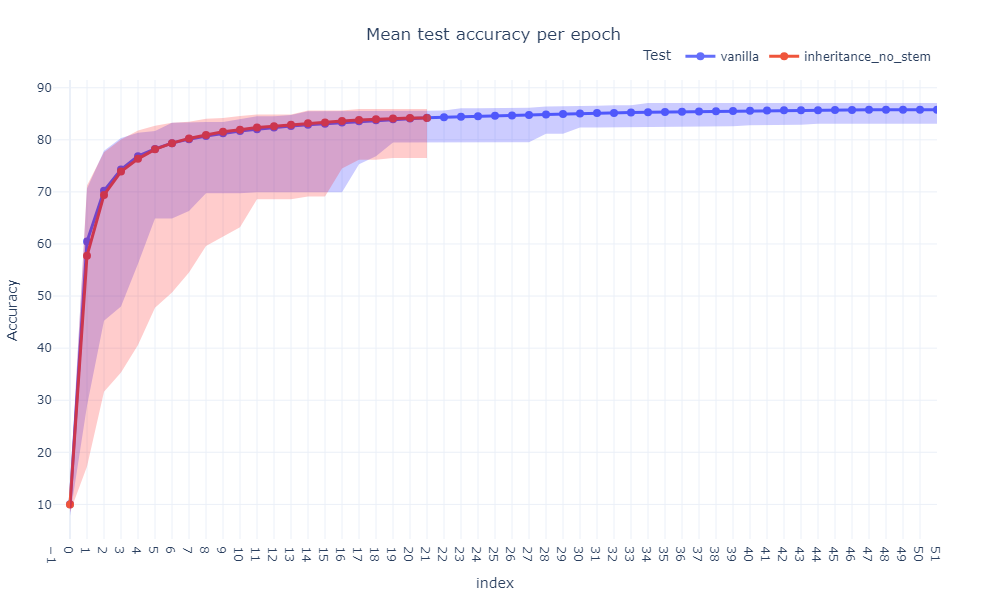

In [287]:
import plotly.express as px
import pandas as pd

# Assuming 'mean_df', 'df_min', and 'df_max' are your dataframes
fig = px.line(
    mean_df, 
    y=['vanilla', test_name], 
    title='Mean test accuracy per epoch',
    labels={"Value": "Accuracy"},
    markers=True,  # Add markers to the lines
    template="plotly_white", 
    width=1000, height=600
)

# Update trace settings for the main plot
fig.update_traces(line=dict(width=3), marker=dict(size=8))

# Adding min-max range shadows for 'vanilla'
#fig.add_traces([
#    px.line(mean_df, y='vanilla').data[0],  # Add the vanilla mean line
#    px.line(mean_df, y='inheritance').data[0]  # Add the inheritance mean line
#])

fig.add_traces([
    # Min-max shadows for 'vanilla'
    dict(
        x=mean_df.index, 
        y=df_min['vanilla'], 
        fill=None,
        mode='lines',
        line=dict(width=0),
        showlegend=False
    ),
    dict(
        x=mean_df.index, 
        y=df_max['vanilla'], 
        fill='tonexty',  # Fill the area between min and max
        mode='lines',
        line=dict(width=0),
        fillcolor='rgba(0, 0, 255, 0.2)',  # Light red for shadow
        showlegend=False
    ),
    
    # Min-max shadows for 'inheritance'
    dict(
        x=mean_df.index, 
        y=df_min[test_name], 
        fill=None,
        mode='lines',
        line=dict(width=0),
        showlegend=False
    ),
    dict(
        x=mean_df.index, 
        y=df_max[test_name], 
        fill='tonexty',  # Fill the area between min and max
        mode='lines',
        line=dict(width=0),
        fillcolor='rgba(255, 0, 0, 0.2)',  # Light blue for shadow
        showlegend=False
    )
])

# Update layout settings
fig.update_layout(
    title={'text': 'Mean test accuracy per epoch', 'x':0.5, 'xanchor': 'center'},
    xaxis=dict(tickmode='linear', dtick=1, showgrid=True, range=[-1, 51]),
    yaxis=dict(title="Accuracy"),
    legend=dict(title='Test', orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    margin=dict(l=50, r=50, t=80, b=50)
)

# Display the plot
fig.show()


In [288]:
test_name

'inheritance_no_stem'

In [289]:
dataset

'LaMelo'

In [290]:
test_path=f"thesis_plots/{dataset}/{test_name}"
os.makedirs(test_path,exist_ok=True)
fig.write_image(f"{test_path}/mean_accuracy.png",format="png")
fig.write_image(f"{test_path}/mean_accuracy.svg", format="svg")


In [291]:
train_data.sort_values("best_acc",ascending=False)

epoch,epoch_0,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,epoch_7,epoch_8,epoch_9,...,epoch_42,epoch_43,epoch_44,epoch_45,epoch_46,epoch_47,epoch_48,epoch_49,epoch_50,best_acc
name,,,,,,,,,,,,,,,,,,,,,
pistachio_wren,10.00,55.87,68.46,73.44,78.17,77.41,78.38,81.35,82.37,80.12,...,86.97,86.95,86.97,86.83,86.97,86.99,86.97,87.01,87.08,87.08
fragrant_butterfly,10.00,64.42,73.29,77.86,76.99,74.65,80.48,80.90,82.31,82.81,...,86.53,86.67,86.63,86.51,86.59,86.61,86.56,86.56,86.51,87.07
organic_lorikeet,10.00,58.98,73.07,73.69,77.45,79.22,79.79,79.83,80.57,78.89,...,86.52,86.62,86.67,86.67,86.95,86.88,87.02,86.82,86.87,87.02
dangerous_degu,10.00,64.56,73.46,71.98,79.11,78.57,82.26,80.90,82.21,82.69,...,86.72,86.93,86.72,86.65,86.80,86.77,86.57,86.63,86.71,86.93
tested_nuthatch,10.08,69.42,75.82,80.34,77.17,81.07,81.25,80.63,82.22,82.88,...,86.46,86.49,86.35,86.48,86.52,86.55,86.64,86.54,86.50,86.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lilac_jackdaw,11.20,39.74,53.81,63.96,64.98,65.28,71.93,71.93,72.71,73.60,...,84.08,83.83,83.98,84.15,84.20,84.35,84.21,84.21,84.18,84.35
wandering_silkworm,10.00,52.54,63.02,68.75,74.32,75.82,68.23,77.24,78.99,80.07,...,84.07,84.09,84.33,84.28,84.17,84.23,84.17,84.20,84.24,84.33
garnet_grasshopper,10.00,39.67,54.89,60.48,65.68,68.82,72.33,73.53,74.97,76.58,...,83.13,83.23,83.36,83.15,83.33,83.26,83.26,83.35,83.25,83.47


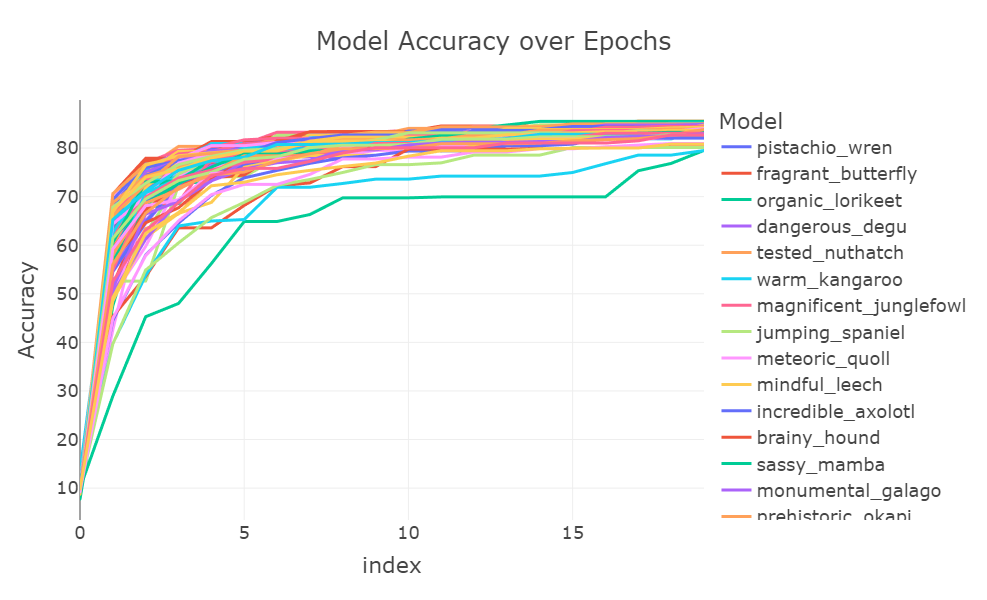

In [292]:
epochs_data=train_data_cum.sort_values("best_acc",ascending= False).iloc[:,:20].T.reset_index(drop=True).reset_index().melt(id_vars='index', var_name='Model', value_name='Accuracy')

import plotly.express as px
fig = px.line(epochs_data, x='index', y='Accuracy', color='Model', title='Model Accuracy over Epochs')
fig.update_layout(height=600, width=800, template="presentation")
fig

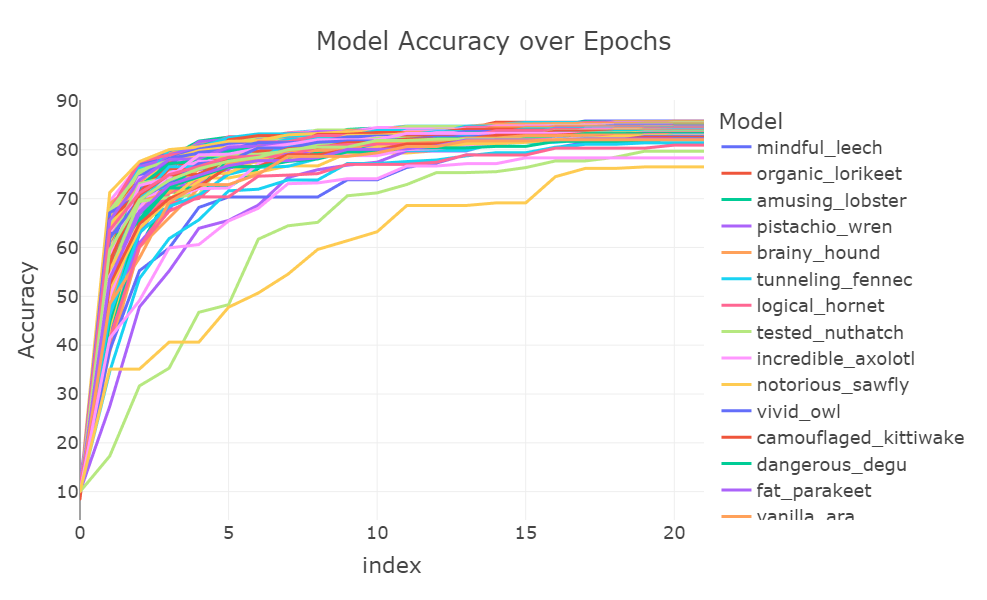

In [293]:
epochs_data=train_data_dist_cum.sort_values("best_acc",ascending= False).iloc[:,:50].T.reset_index(drop=True).reset_index().melt(id_vars='index', var_name='Model', value_name='Accuracy')

import plotly.express as px
fig = px.line(epochs_data, x='index', y='Accuracy', color='Model', title='Model Accuracy over Epochs')
fig.update_layout(height=600, width=800, template="presentation")
fig

In [294]:
train_data_cum=train_data_cum.reset_index()
train_data=train_data.reset_index()

train_data_dist_cum=train_data_dist_cum.reset_index()
train_data_dist=train_data_dist.reset_index()


In [295]:
n_epochs=20

In [296]:
correlation_matrix_base = train_data_cum.set_index("name").corr()
# Select the correlations with the last column
correlation_with_last_base = correlation_matrix_base.iloc[:-1, -1]

df_comp=pd.merge(train_data_dist_cum.iloc[:,:-1], train_data_cum[["name","best_acc"]], on="name")
correlation_matrix = df_comp.set_index("name").corr()
# Select the correlations with the last column
correlation_with_last = correlation_matrix.iloc[:-1, -1]

corr_df=pd.concat([pd.DataFrame(correlation_with_last_base).rename(columns={"best_acc":"base"}), pd.DataFrame(correlation_with_last).rename(columns={"best_acc":"dist"})], axis=1)


In [297]:
train_data_dist_cum

epoch,name,epoch_0,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,epoch_7,epoch_8,...,epoch_12,epoch_13,epoch_14,epoch_15,epoch_16,epoch_17,epoch_18,epoch_19,epoch_20,best_acc
0,adaptable_jacamar,10.03,65.12,74.13,75.74,78.17,80.27,81.57,81.57,81.57,...,83.62,83.62,83.62,84.21,84.21,84.21,84.68,84.68,84.91,84.91
1,adventurous_wallaby,10.00,68.92,73.86,78.22,80.00,80.00,81.11,81.46,81.46,...,83.53,83.78,83.78,84.33,84.65,84.96,85.07,85.07,85.07,85.07
2,aloof_fulmar,8.63,57.20,70.80,74.88,74.94,78.13,78.13,80.21,80.41,...,82.22,82.22,82.97,82.97,82.97,83.32,83.32,83.34,83.39,83.39
3,ambrosial_leopard,10.00,58.22,71.72,75.50,75.88,77.77,78.59,80.54,80.54,...,81.80,82.47,83.02,83.02,83.02,83.02,83.79,84.04,84.56,84.56
4,amusing_lobster,10.00,61.20,74.92,78.48,81.78,82.61,82.61,82.61,83.13,...,84.47,84.47,84.73,85.12,85.12,85.81,85.81,85.81,85.81,85.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,vivid_owl,8.92,43.18,62.75,72.27,73.71,77.97,78.24,79.25,79.75,...,82.01,82.01,83.87,83.87,83.92,84.39,84.39,85.40,85.40,85.40
116,wandering_silkworm,10.00,34.60,53.65,61.82,65.65,71.60,71.93,73.83,73.83,...,77.91,78.76,79.40,79.40,80.53,81.13,81.13,81.42,81.42,81.42
117,warm_kangaroo,10.00,62.34,73.42,74.99,78.04,78.04,82.14,82.14,82.14,...,83.73,83.73,83.74,84.16,84.77,84.77,84.77,84.77,84.77,84.77
118,weightless_lemur,10.00,57.24,70.10,76.53,76.53,78.04,78.25,81.03,81.03,...,82.30,82.83,82.93,82.93,83.42,83.42,83.69,83.69,83.69,83.69


In [298]:
total_data=[]


pairs = list(combinations(train_data_cum.index, 2))
combined_data = []

for idx1, idx2 in pairs:
    row1 = train_data_cum.loc[idx1]
    row2 = train_data_cum.loc[idx2]
    #row1 = train_data.loc[idx1]
    #row2 = train_data.loc[idx2]
    

    combined_row = {
        'name_A': row1['name'],
        'name_B': row2['name'],
        'best_acc_A': row1['best_acc'],
        'best_acc_B': row2['best_acc'],
        #'label': 1 if row1['best_acc'] > row2['best_acc'] else 0
        'label': row1['best_acc'] - row2['best_acc'] 

        
    }
    # Create the epochs_row dictionary
    epochs_rows = {
        f'epoch_{epoch}_A': row1[f'epoch_{epoch}'] for epoch in range(0, 51)
    }
    epochs_rows.update({
        f'epoch_{epoch}_B': row2[f'epoch_{epoch}'] for epoch in range(0, 51)
    })
    ##############################################################
    row1_dist=train_data_dist_cum.loc[idx1]
    row2_dist=train_data_dist_cum.loc[idx2]
    
    #row1_dist=train_data_dist.loc[idx1]
    #row2_dist=train_data_dist.loc[idx2]
    dist_rows= {
        f'dist_{epoch}_A': row1_dist[f'epoch_{epoch}'] for epoch in range(0, n_epochs+1)
    }
    dist_rows.update({
        f'dist_{epoch}_B': row2_dist[f'epoch_{epoch}'] for epoch in range(0, n_epochs+1)
    })
    combined_row.update(dist_rows)
    #######################
    
    # Update combined_row with epochs_rows
    combined_row.update(epochs_rows)

    combined_data.append(combined_row)

combined_df = pd.DataFrame(combined_data)



In [299]:
X_test_new=combined_df.drop(columns=['label'])
y_test_new=combined_df["label"]

In [300]:
epoch=5
X_test_new[["name_A","name_B","best_acc_A","best_acc_B",f"dist_{epoch}_A",f"dist_{epoch}_B",f"epoch_{epoch}_A",f"epoch_{epoch}_B"]]

,name_A,name_B,best_acc_A,best_acc_B,dist_5_A,dist_5_B,epoch_5_A,epoch_5_B
0,adaptable_jacamar,adventurous_wallaby,85.97,86.13,80.27,80.00,78.24,79.72
1,adaptable_jacamar,aloof_fulmar,85.97,85.58,80.27,78.13,78.24,77.87
2,adaptable_jacamar,ambrosial_leopard,85.97,85.27,80.27,77.77,78.24,78.91
3,adaptable_jacamar,amusing_lobster,85.97,86.56,80.27,82.61,78.24,80.95
4,adaptable_jacamar,angelic_coati,85.97,85.24,80.27,77.27,78.24,79.85
...,...,...,...,...,...,...,...,...
7135,wandering_silkworm,weightless_lemur,84.33,84.88,71.60,78.04,75.82,77.05
7136,wandering_silkworm,wonderful_cow,84.33,86.06,71.60,80.28,75.82,79.69
7137,warm_kangaroo,weightless_lemur,86.88,84.88,78.04,78.04,80.11,77.05
7138,warm_kangaroo,wonderful_cow,86.88,86.06,78.04,80.28,80.11,79.69


In [301]:
#epoch=10

#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#y_0=np.repeat(0,len(y_test_new))
#y_0= (X_test_new[f'epoch_{epoch}_A'] > X_test_new[f'epoch_{epoch}_B']).astype(int).values
## Calculate accuracy
#y_0_accuracy = accuracy_score(y_test_new, y_0)
#print(f"Accuracy: {y_0_accuracy}")

In [302]:
#y_0=np.repeat(0,len(y_test_new))
#y_0= (X_test_new[f'dist_{epoch}_A'] > X_test_new[f'dist_{epoch}_B']).astype(int).values
# Calculate accuracy
#y_0_accuracy = accuracy_score(y_test_new, y_0)
#print(f"Accuracy: {y_0_accuracy}")

In [303]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau

def kendall_tau_distance(list1, list2):
    tau, _ = kendalltau(list1, list2)
    return tau
def spearman_rank_correlation(list1, list2):
    corr, _ = spearmanr(list1, list2)
    return corr
def get_correlations_epochs(combined_df):  
    #accs={}
    #accs_slope={}
    corrs={}
    corrs_slope={}
    
    rankings_slope={}
    rankings_vanilla={}
    results={}
    X_test_new=combined_df
    y_test_new=combined_df["label"]
    for epoch in range(0,51):
        #############################
        #if epoch<=n_epochs:
        #    y_pred_slope= (X_test_new[f'dist_{epoch}_A'] >= X_test_new[f'dist_{epoch}_B']).astype(int).values        
        #else:
        #    y_pred_slope= (X_test_new[f'epoch_{epoch}_A'] >= X_test_new[f'epoch_{epoch}_B']).astype(int).values
        if epoch<=n_epochs:
            y_pred_slope= (X_test_new[f'dist_{epoch}_A'] - X_test_new[f'dist_{epoch}_B']).values        
        else:
            y_pred_slope= (X_test_new[f'epoch_{epoch}_A'] - X_test_new[f'epoch_{epoch}_B']).values
        #print(y_pred_slope)
        #accuracy_slope = accuracy_score(y_test_new, y_pred_slope)
        #accs_slope[epoch]=accuracy_slope
        ############################
        #y_epoch_10_pred= (X_test_new[f'epoch_{epoch}_A'] >= X_test_new[f'epoch_{epoch}_B']).astype(int).values
        y_epoch_10_pred= (X_test_new[f'epoch_{epoch}_A'] - X_test_new[f'epoch_{epoch}_B']).values

        
        #accuracy = accuracy_score(y_test_new, y_epoch_10_pred)
        #accs[epoch]=accuracy
        
        ranking_test_df=X_test_new[["name_A","name_B", "label"]]
        ranking_test_df["pred_10_epochs"]=y_epoch_10_pred
        #####################
        ranking_test_df["pred_slope"]=y_pred_slope
        ################################
        # Create a new column by applying the function to each row
        ranking_target={}
        ranking_10={}
        ranking_slope={}
        
        for ind in list(ranking_test_df.name_A.unique())+list(ranking_test_df.name_B.unique()):
            ranking_target[ind]=0
            ranking_10[ind]=0
            ranking_slope[ind]=0
            
        for index, row in ranking_test_df.iterrows():
            #if row["label"]==1:
            #    ranking_target[row["name_A"]]=ranking_target[row["name_A"]]+1
            #else:
            #    ranking_target[row["name_B"]]=ranking_target[row["name_B"]]+1

            #if row["pred_10_epochs"]==1:
            #    ranking_10[row["name_A"]]=ranking_10[row["name_A"]]+1
            #else:
            #    ranking_10[row["name_B"]]=ranking_10[row["name_B"]]+1

            #if row["pred_slope"]==1:
            #    ranking_slope[row["name_A"]]=ranking_slope[row["name_A"]]+1
            #else:
            #    ranking_slope[row["name_B"]]=ranking_slope[row["name_B"]]+1
            ranking_target[row["name_A"]]=ranking_target[row["name_A"]]+row[f"label"]
            ranking_target[row["name_B"]]=ranking_target[row["name_B"]]-row[f"label"]

            ranking_10[row["name_A"]]=ranking_10[row["name_A"]]+row["pred_10_epochs"]
            ranking_10[row["name_B"]]=ranking_10[row["name_B"]]-row["pred_10_epochs"]

            ranking_slope[row["name_A"]]= ranking_slope[row["name_A"]]+row["pred_slope"]
            ranking_slope[row["name_B"]]= ranking_slope[row["name_B"]]-row["pred_slope"]
            
            
        ranking_target_df=pd.DataFrame([ranking_target]).T.rename(columns={0:"score"}).sort_values(by="score", ascending=False)
        ranking_10_df=pd.DataFrame([ranking_10]).T.rename(columns={0:"score"}).sort_values(by="score", ascending=False)

        ranking_slope_df=pd.DataFrame([ranking_slope]).T.rename(columns={0:"score"}).sort_values(by="score", ascending=False)

        rankings_slope[epoch]=ranking_slope_df
        rankings_vanilla[epoch]=ranking_10_df
        ######## Correlation #########
        # Example usage
        target =ranking_target_df.index.tolist()
        list_to_compare_10 = ranking_10_df.index.tolist()
        # Convert the lists to ranks
        target_ranks = {k: i for i, k in enumerate(target)}
        list_to_compare_ranks_10 = [target_ranks[x] for x in list_to_compare_10]
        
        #####################################
        list_to_compare_slope = ranking_slope_df.index.tolist()
        list_to_compare_ranks_slope = [target_ranks[x] for x in list_to_compare_slope]
        spearman_corr_slope = spearman_rank_correlation(list_to_compare_ranks_slope, list(range(len(target))))
        corrs_slope[epoch]=spearman_corr_slope
        
        # Calculate Spearman rank correlation
        spearman_corr_10 = spearman_rank_correlation(list_to_compare_ranks_10, list(range(len(target))))
        print(f'Spearman rank correlation: {spearman_corr_10}')
        # Calculate Kendall Tau distance
        tau_distance_10 = kendall_tau_distance(list_to_compare_ranks_10, list(range(len(target))))
        print(f'Kendall Tau distance: {tau_distance_10}')
        corrs[epoch]=spearman_corr_10
        

    
    #results["accuracy"]=accs
    results["correlation_vanilla"]=corrs
    #results["accuracy_kd"]=accs_slope
    results["correlation_kd"]=corrs_slope
    return results, ranking_target_df, rankings_vanilla, rankings_slope


In [304]:
corr_epochs,  ranking_target_df, rankings_vanilla, rankings_slope=get_correlations_epochs(combined_df)

/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.18190152093895406
Kendall Tau distance: 0.12773109243697478


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.43723175220501415
Kendall Tau distance: 0.29523809523809524


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.528745051739704
Kendall Tau distance: 0.3705882352941176


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.5264532259184665
Kendall Tau distance: 0.372829131652661


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.6001388985346203
Kendall Tau distance: 0.4277310924369747


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.5694839919438849
Kendall Tau distance: 0.40952380952380946


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.6208347801930688
Kendall Tau distance: 0.45518207282913165


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.6093339815264948
Kendall Tau distance: 0.4425770308123249


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.6357594277380373
Kendall Tau distance: 0.46274509803921565


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.6829640947288005
Kendall Tau distance: 0.5044817927170868


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.7777970692409193
Kendall Tau distance: 0.595798319327731


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.7225432321689005
Kendall Tau distance: 0.5417366946778711


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.7045905965692061
Kendall Tau distance: 0.5249299719887954


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.7108340857003957
Kendall Tau distance: 0.527170868347339


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.7396972011945273
Kendall Tau distance: 0.5627450980392157


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.7579693034238488
Kendall Tau distance: 0.5773109243697478


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.7862143204389191
Kendall Tau distance: 0.5971988795518206


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.7906937981804291
Kendall Tau distance: 0.6033613445378151


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.8197513716230292
Kendall Tau distance: 0.6361344537815126


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.8111813320369469
Kendall Tau distance: 0.6310924369747898


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.8299673588443641
Kendall Tau distance: 0.6509803921568627


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.8145635113549551
Kendall Tau distance: 0.638095238095238


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.8337801236196958
Kendall Tau distance: 0.6551820728291315


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.863803041877908
Kendall Tau distance: 0.6890756302521008


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.8798666574067642
Kendall Tau distance: 0.7053221288515406


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.8931661920966733
Kendall Tau distance: 0.7196078431372549


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9153413431488295
Kendall Tau distance: 0.7551820728291315


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9248906174039861
Kendall Tau distance: 0.7742296918767506


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9040280575039932
Kendall Tau distance: 0.7364145658263305


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9174248211681366
Kendall Tau distance: 0.7481792717086834


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9237794291270225
Kendall Tau distance: 0.7607843137254902


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.92810611848045
Kendall Tau distance: 0.7694677871148458


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9366831029932634
Kendall Tau distance: 0.7876750700280111


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9313077297034513
Kendall Tau distance: 0.7784313725490196


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9257656781720952
Kendall Tau distance: 0.7691876750700279


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9221265365650392
Kendall Tau distance: 0.7666666666666665


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9264810056253905
Kendall Tau distance: 0.7747899159663865


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9413223140495867
Kendall Tau distance: 0.7983193277310924


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9452739773595388
Kendall Tau distance: 0.8086834733893558


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9572192513368983
Kendall Tau distance: 0.8324929971988795


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9716924786443502
Kendall Tau distance: 0.864985994397759


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9788388082505728
Kendall Tau distance: 0.8840336134453781


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9838044308632543
Kendall Tau distance: 0.9016806722689076


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.984950343773873
Kendall Tau distance: 0.9078431372549018


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9880894506562954
Kendall Tau distance: 0.9193277310924368


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9923883603027988
Kendall Tau distance: 0.9386554621848738


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9966178206819917
Kendall Tau distance: 0.9627450980392157


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9984165567053267
Kendall Tau distance: 0.9770308123249299


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9991179943051599
Kendall Tau distance: 0.9868347338935574


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9995833043961385
Kendall Tau distance: 0.9932773109243698


/tmp/ipykernel_2682890/3141203929.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2682890/3141203929.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 1.0
Kendall Tau distance: 0.9999999999999998


In [305]:
vanilla_top_scores=[]

for epoch in range(51):
    final_score=0
    positions = [ranking_target_df.index.get_loc(label) for label in rankings_vanilla[epoch].index[:5]]
    for pos in positions:
        if pos>4:
            final_score=final_score+(pos-4)
    vanilla_top_scores.append(100-final_score)


    
dist_top_scores=[]

for epoch in range(51):
    final_score=0
    positions = [ranking_target_df.index.get_loc(label) for label in rankings_slope[epoch].index[:5]]
    for pos in positions:
        if pos>4:
            final_score=final_score+(pos-4)
    dist_top_scores.append(100-final_score)

In [306]:
top_5_labels = ranking_target_df.index[:5]

vanilla_scores=[]
vanilla_accs=[]
for epoch in range(51):
    final_score=0
    final_acc=0
    positions = [rankings_vanilla[epoch].index.get_loc(label) for label in top_5_labels]
    for pos in positions:
        if pos>4:
            final_score=final_score+(pos-4)
        else:
            final_acc=final_acc+1
    vanilla_scores.append(100-final_score)
    vanilla_accs.append(final_acc*100/5)

    
dist_scores=[]
dist_accs=[]

for epoch in range(51):
    final_score=0
    final_acc=0
    positions = [rankings_slope[epoch].index.get_loc(label) for label in top_5_labels]
    for pos in positions:
        if pos>4:
            final_score=final_score+(pos-4)
        else:
            final_acc=final_acc+1
    dist_scores.append(100-final_score)
    dist_accs.append(final_acc*100/5)

In [307]:
# Parameters
df_scores=pd.DataFrame([vanilla_scores,dist_scores]).T.reset_index()
df_scores.columns=["Epoch","Score vanilla","Score test"]

df_top_scores=pd.DataFrame([vanilla_top_scores,dist_top_scores]).T.reset_index()
df_top_scores.columns=["Epoch","Score vanilla","Score test"]

df_accs=pd.DataFrame([vanilla_accs,dist_accs]).T.reset_index()
df_accs.columns=["Epoch","Accuracy vanilla","Accuracy test"]



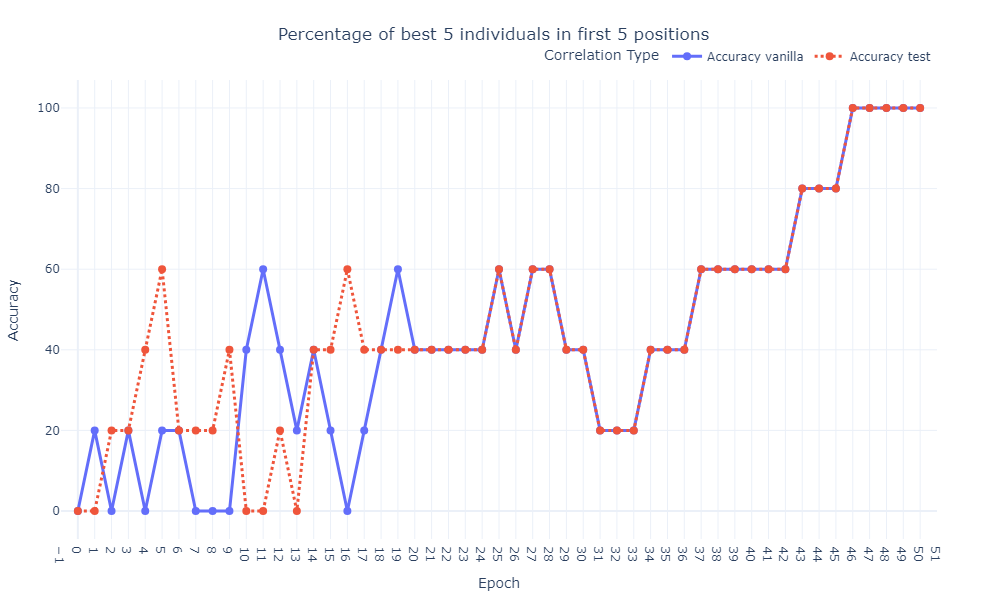

In [308]:
# Melt dataframe for Plotly
df_melted = df_accs.melt(id_vars='Epoch', value_vars=['Accuracy vanilla', "Accuracy test"], 
                    var_name='Type', value_name='Value')

# Create the plot
fig = px.line(df_melted, x='Epoch', y='Value', color='Type', 
              title='Vanilla and KD Ranking Correlation for the First 20 Epochs with 120 Models',
              labels={"Value": "Accuracy"},
              line_dash="Type",  # Different line styles for different types
              markers=True,  # Add markers to the lines
              template="plotly_white",  # A clean, professional template
              width=1000, height=600)

# Update trace settings
fig.update_traces(line=dict(width=3), marker=dict(size=8))

# Update layout settings
fig.update_layout(
    title={'text': 'Percentage of best 5 individuals in first 5 positions', 'x':0.5, 'xanchor': 'center'},
    #yaxis=dict(range=[0.0, df_melted['Value'].max()+0.05], showgrid=True),
    xaxis=dict(tickmode='linear', dtick=1, showgrid=True, range=[-1, 51]),
    legend=dict(title='Correlation Type', orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    margin=dict(l=50, r=50, t=80, b=50)
)

# Display the plot
fig.show()

In [309]:
dataset

'LaMelo'

In [310]:
file_name="top_models_accuracy"
#os.makedirs(f"thesis_plots/{dataset}",  exist_ok=True)
os.makedirs(f"thesis_plots/{dataset}/{test_name}",  exist_ok=True)
fig.write_image(f"thesis_plots/{dataset}/{test_name}/{file_name}.svg", format="svg")
fig.write_image(f"thesis_plots/{dataset}/{test_name}/{file_name}.png", format="png")

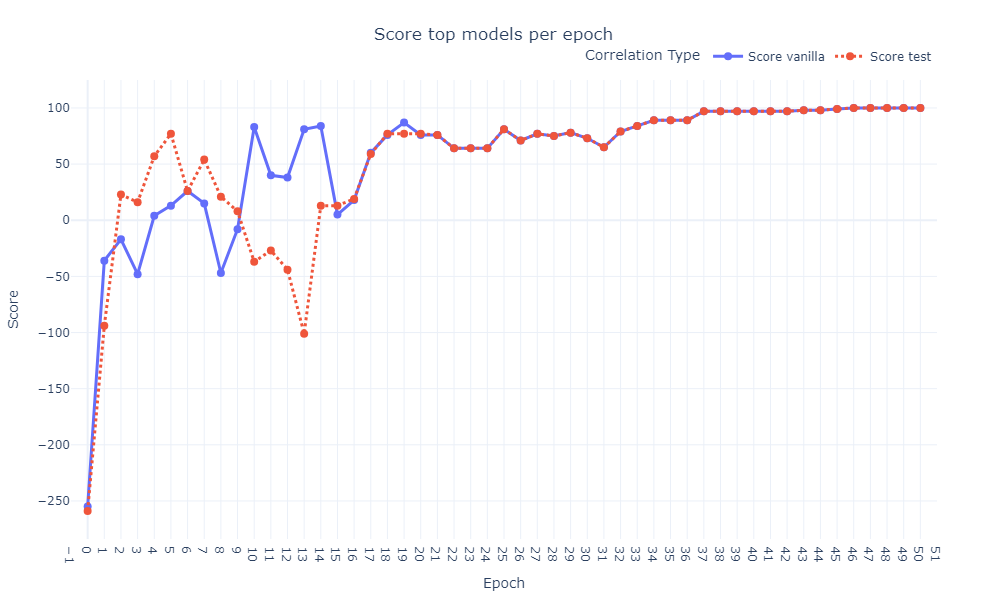

In [311]:
# Melt dataframe for Plotly
df_melted = df_top_scores.melt(id_vars='Epoch', value_vars=['Score vanilla', "Score test"], 
                    var_name='Type', value_name='Value')

# Create the plot
fig = px.line(df_melted, x='Epoch', y='Value', color='Type', 
              title='Score top models per epoch',
              labels={"Value": "Score"},
              line_dash="Type",  # Different line styles for different types
              markers=True,  # Add markers to the lines
              template="plotly_white",  # A clean, professional template
              width=1000, height=600)

# Update trace settings
fig.update_traces(line=dict(width=3), marker=dict(size=8))

# Update layout settings
fig.update_layout(
    title={'text': 'Score top models per epoch', 'x':0.5, 'xanchor': 'center'},
    #yaxis=dict(range=[0.0, df_melted['Value'].max()+0.05], showgrid=True),
    xaxis=dict(tickmode='linear', dtick=1, showgrid=True, range=[-1, 51]),
    legend=dict(title='Correlation Type', orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    margin=dict(l=50, r=50, t=80, b=50)
)

# Display the plot
fig.show()

In [312]:
file_name="scores_best_models_epoch"
fig.write_image(f"thesis_plots/{dataset}/{test_name}/{file_name}.svg", format="svg")
fig.write_image(f"thesis_plots/{dataset}/{test_name}/{file_name}.png", format="png")

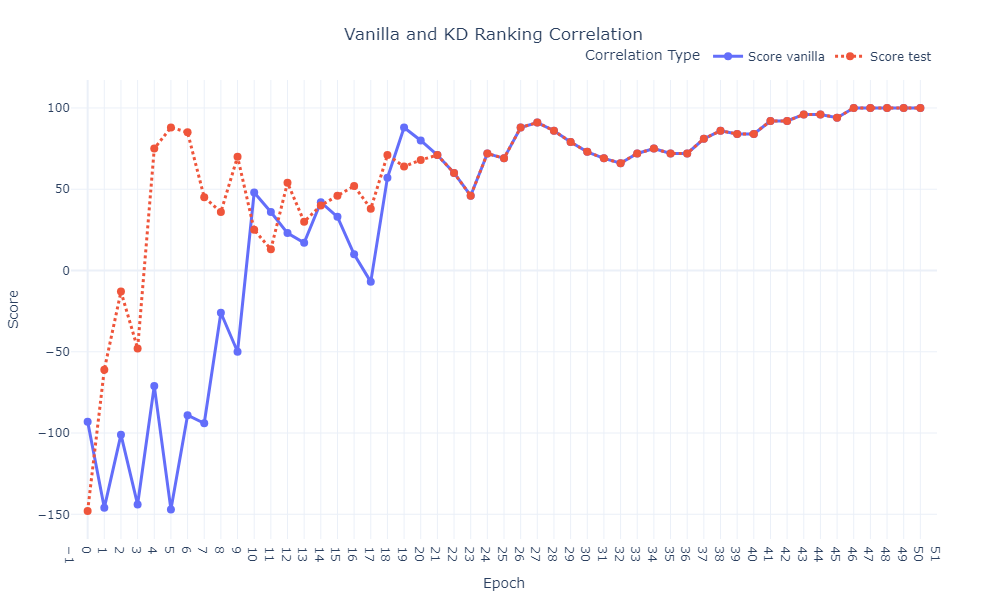

In [313]:
# Melt dataframe for Plotly
df_melted = df_scores.melt(id_vars='Epoch', value_vars=['Score vanilla', "Score test"], 
                    var_name='Type', value_name='Value')

# Create the plot
fig = px.line(df_melted, x='Epoch', y='Value', color='Type', 
              title='Score top models',
              labels={"Value": "Score"},
              line_dash="Type",  # Different line styles for different types
              markers=True,  # Add markers to the lines
              template="plotly_white",  # A clean, professional template
              width=1000, height=600)

# Update trace settings
fig.update_traces(line=dict(width=3), marker=dict(size=8))

# Update layout settings
fig.update_layout(
    title={'text': 'Vanilla and KD Ranking Correlation', 'x':0.5, 'xanchor': 'center'},
    #yaxis=dict(range=[0.0, df_melted['Value'].max()+0.05], showgrid=True),
    xaxis=dict(tickmode='linear', dtick=1, showgrid=True, range=[-1, 51]),
    legend=dict(title='Correlation Type', orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    margin=dict(l=50, r=50, t=80, b=50)
)

# Display the plot
fig.show()

In [314]:
file_name="scores_top_models"
fig.write_image(f"thesis_plots/{dataset}/{test_name}/{file_name}.svg", format="svg")
fig.write_image(f"thesis_plots/{dataset}/{test_name}/{file_name}.png", format="png")

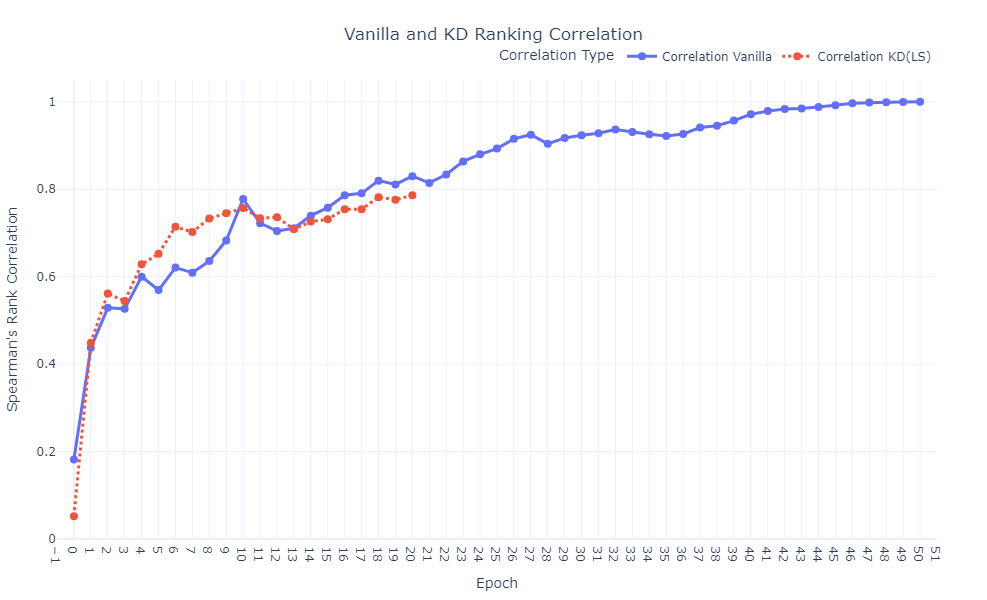

In [315]:
# Parameters
test_column = 'Correlation KD(LS)'
#n_epochs = 20

# Create dataframes
df = pd.DataFrame(list(corr_epochs["correlation_vanilla"].items()), columns=['Epoch', 'Correlation Vanilla'])
df_slope = pd.DataFrame(list(corr_epochs["correlation_kd"].items()), columns=['Epoch', test_column])

# Merge dataframes
df = pd.merge(df, df_slope, on="Epoch")

# Introduce NaNs for data after n_epochs+1
df.loc[n_epochs+1:, test_column] = np.nan

# Melt dataframe for Plotly
df_melted = df.melt(id_vars='Epoch', value_vars=['Correlation Vanilla', test_column], 
                    var_name='Type', value_name='Value')

# Create the plot
fig = px.line(df_melted, x='Epoch', y='Value', color='Type', 
              title='Vanilla and KD Ranking Correlation for the First 20 Epochs with 120 Models',
              labels={"Value": "Spearman's Rank Correlation"},
              line_dash="Type",  # Different line styles for different types
              markers=True,  # Add markers to the lines
              template="plotly_white",  # A clean, professional template
              width=1000, height=600)

# Update trace settings
fig.update_traces(line=dict(width=3), marker=dict(size=8))

# Update layout settings
fig.update_layout(
    title={'text': 'Vanilla and KD Ranking Correlation', 'x':0.5, 'xanchor': 'center'},
    yaxis=dict(range=[0.0, df_melted['Value'].max()+0.05], showgrid=True),
    xaxis=dict(tickmode='linear', dtick=1, showgrid=True, range=[-1, 51]),
    legend=dict(title='Correlation Type', orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    margin=dict(l=50, r=50, t=80, b=50)
)

# Display the plot
fig.show()

In [316]:
file_name="ranking_correlation"
fig.write_image(f"thesis_plots/{dataset}/{test_name}/{file_name}.svg", format="svg")
fig.write_image(f"thesis_plots/{dataset}/{test_name}/{file_name}.png", format="png")

In [317]:
#fig.write_image(f"thesis_plots/Adaline_kd_correlation.png", format="png")
#fig.write_image(f"thesis_plots/Adaline_kd_correlation.svg", format="svg")

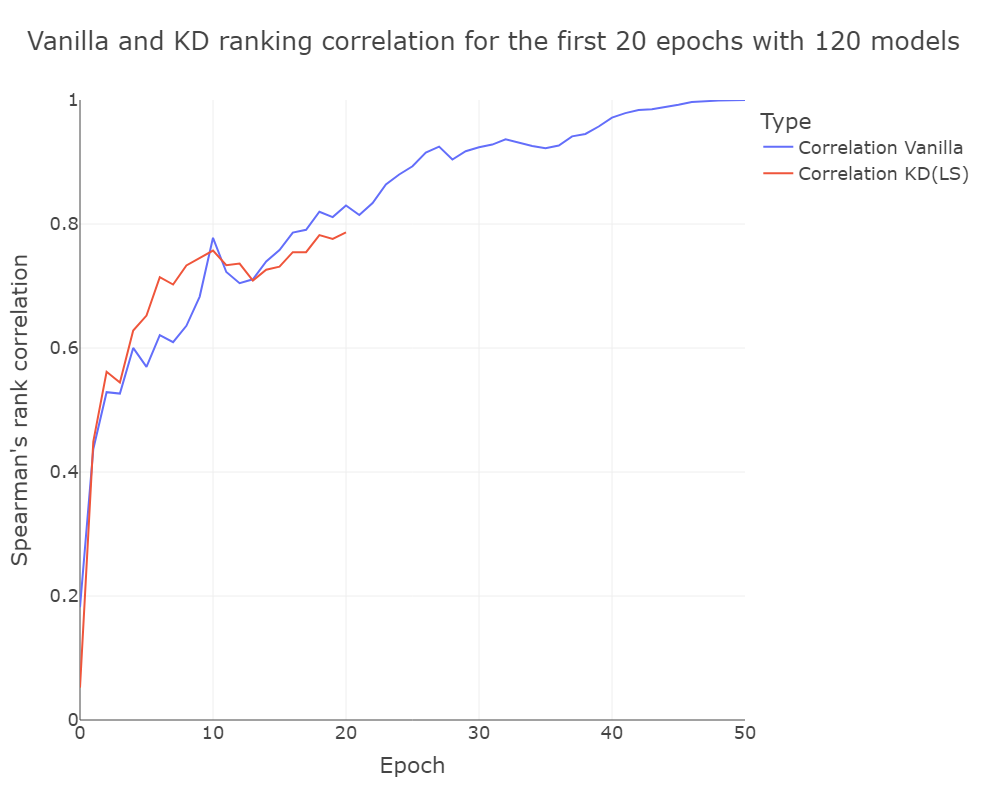

In [318]:
test_column= 'Correlation KD(LS)'
n_epochs=20
df = pd.DataFrame(list(corr_epochs["correlation_vanilla"].items()), columns=['Epoch', 'Correlation Vanilla'])
df_slope = pd.DataFrame(list(corr_epochs["correlation_kd"].items()), columns=['Epoch', test_column])

df=pd.merge(df, df_slope, on="Epoch")
df.loc[n_epochs+1:, test_column] = np.nan
# Create the line plot using Plotly
df_melted = df.melt(id_vars='Epoch', value_vars=['Correlation Vanilla', test_column], 
                    var_name='Type', value_name='Value')

# Plot the data
fig = px.line(df_melted, x='Epoch', y='Value', color='Type', 
              title='Vanilla and KD ranking correlation for the first 20 epochs with 120 models')
fig.update_traces(line=dict(width=2)) 
fig.update_layout(width=1000, height=800, template="presentation",
                 yaxis_title="Spearman's rank correlation",
                 yaxis=dict(range=[0.0, df_melted['Value'].max()]))

fig

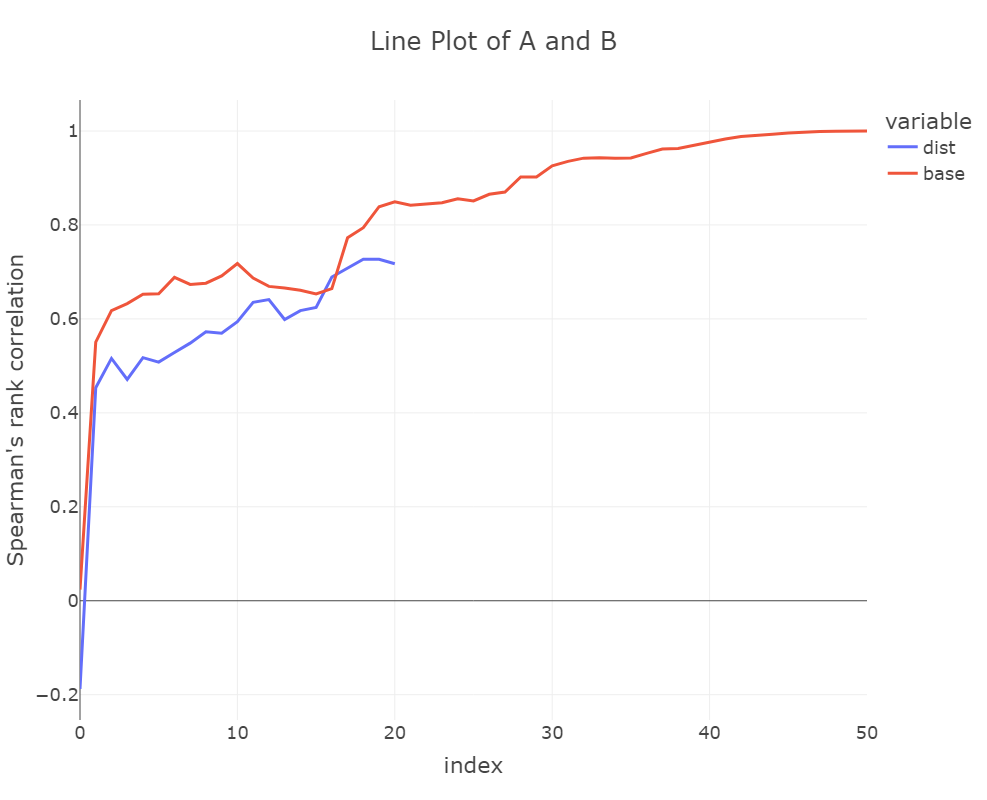

In [319]:
import plotly.express as px

# Create a line plot with two lines (one for each column)
fig = px.line(corr_df.reset_index(drop=True), y=['dist', 'base'], title="Line Plot of A and B")
fig.update_layout(width=800, height=800, template="presentation",
                 yaxis_title="Spearman's rank correlation")
# Show the plot
fig.show()